In [1]:
#from https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import pickle
df = pd.read_csv("../PreProcessamentoDados/cleanedData.csv")

In [2]:
df[['Hour','Minute','Second']] = df.DateTime.str.split(":",expand=True)

In [76]:
df.head()

,DateTime,Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Hour,Minute,Second
0,00:15:00,0.0,11.0,8.0,1021.0,128.333333,8.666667,17.000000,83.000000,0.0,0.0,0.0,00,15,00
1,00:30:00,0.0,11.0,8.0,1021.0,133.333333,1.333333,19.000000,83.000000,0.0,0.0,0.0,00,30,00
2,00:45:00,0.0,11.0,8.0,1021.0,127.666667,3.000000,12.333333,82.333333,0.0,0.0,0.0,00,45,00
3,01:00:00,0.0,11.0,8.0,1021.0,128.000000,1.333333,10.000000,81.000000,0.0,0.0,0.0,01,00,00
4,01:15:00,0.0,11.0,8.0,1021.0,130.000000,2.666667,11.000000,80.666667,0.0,0.0,0.0,01,15,00


In [ ]:
df.dtypes

In [3]:
# define a dictionary of column names and their corresponding data types
dtypes_dict = {'Hour': float, 'Minute': float}

# convert the columns to their corresponding data types
df = df.astype(dtypes_dict)

In [78]:
df.head()

,DateTime,Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Hour,Minute,Second
0,00:15:00,0.0,11.0,8.0,1021.0,128.333333,8.666667,17.000000,83.000000,0.0,0.0,0.0,0.0,15.0,00
1,00:30:00,0.0,11.0,8.0,1021.0,133.333333,1.333333,19.000000,83.000000,0.0,0.0,0.0,0.0,30.0,00
2,00:45:00,0.0,11.0,8.0,1021.0,127.666667,3.000000,12.333333,82.333333,0.0,0.0,0.0,0.0,45.0,00
3,01:00:00,0.0,11.0,8.0,1021.0,128.000000,1.333333,10.000000,81.000000,0.0,0.0,0.0,1.0,0.0,00
4,01:15:00,0.0,11.0,8.0,1021.0,130.000000,2.666667,11.000000,80.666667,0.0,0.0,0.0,1.0,15.0,00


In [4]:
# Separate Target Variable and Predictor Variables
TargetVariable = ["Generated power"]
Predictors= ["Hour","Minute","TemperatureC","DewpointC","PressurehPa","WindDirectionDegrees","WindSpeedKMH","WindSpeedGustKMH","Humidity","HourlyPrecipMM","dailyrainMM","SolarRadiationWatts_m2"]

X=df[Predictors].values
y=df[TargetVariable].values

In [ ]:
# check if the array has any negative values
if (y < 0).any():
    print('The array has negative values.')
else:
    print('The array does not have negative values.')

In [ ]:
# y = df['generated_power'].values
# X = df.drop(columns=['generated_power']).values

In [ ]:
# y = y.reshape(-1,1)


In [5]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


In [6]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 

In [ ]:
# check if the array has any negative values
if (y < 0).any():
    print('The array has negative values.')
else:
    print('The array does not have negative values.')

In [7]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=12, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

# Hyperparameter tuning of ANN


# Finding best set of parameters using manual grid search


In [ ]:
import numpy as np

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=1)

            mean_squared_error, mean_absolute_error = model.evaluate(X_test,y_test)

            # print("y_test: ",y_test)
            predictions = model.predict(X_test)
            # print("model.predict(X_test)",predictions)
            MAPE = np.mean(100 * (np.abs(y_test-predictions)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MAPE:',MAPE,'Accuracy:', 100-MAPE,'mean_squared_error: ',mean_squared_error,
                  'mean_absolute_error: ',mean_absolute_error)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE,mean_squared_error,mean_absolute_error]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy','mean_squared_error','mean_absolute_error'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='mean_squared_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='mean_absolute_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:

# importing package
import matplotlib.pyplot as plt
import numpy as np

x = ResultsData["Parameters"]  

# plot lines
plt.plot(x, ResultsData["mean_squared_error"], label = "mean squared")
plt.plot(ResultsData["Parameters"], ResultsData["mean_absolute_error"], label = "mean absolute")
plt.legend()
plt.show()

In [ ]:
ResultsData

In [ ]:
ResultsData.to_csv('ResultsData.csv', index=False)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame with custom options
LoadedResultsData = pd.read_csv('ResultsData.csv', delimiter=',', encoding='utf-8', header=0, names=['TrialNumber','Parameters','Accuracy','mean_squared_error','mean_absolute_error'])

# Display the DataFrame
print(LoadedResultsData)


In [ ]:
%matplotlib inline
LoadedResultsData.plot(x='Parameters', y='mean_squared_error',figsize=(15,4), kind='line')

In [ ]:
%matplotlib inline
LoadedResultsData.plot(x='Parameters', y='mean_absolute_error',figsize=(15,4), kind='line')

In [ ]:
ResultsDataPlot = ResultsData


In [ ]:
ResultsDataPlot

In [ ]:
ResultsDataPlot["Accuracy"] = ResultsDataPlot["Accuracy"].add(100)

In [ ]:
ResultsDataPlot["Accuracy"] = ResultsDataPlot["Accuracy"].multiply(-1)


In [ ]:
ResultsDataPlot

In [ ]:
%matplotlib inline
ResultsDataPlot.plot(x='Parameters', y='mean_squared_error', figsize=(15,4), kind='line')

# Training the ANN model with the best parameters


In [ ]:
# Fitting the ANN to the Training set
#  batch_size = 15, 
#    epochs = 5,
history=model.fit(
    X_train, 
    y_train ,
    batch_size = 5, 
    epochs = 50,     
    verbose=1,
    validation_split = 0.33)

In [13]:
mean_squared_error, mean_absolute_error = model.evaluate(X_test,y_test)
print("MSE: ",mean_squared_error)
print("MAE:" ,mean_absolute_error)

594/594 [==============================] - 1s 1ms/step - loss: 0.1235 - mean_absolute_error: 0.1850
MSE:  0.12354516237974167
MAE: 0.18502894043922424


In [14]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

594/594 [==============================] - 1s 982us/step


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,Predictions)

0.8756476821525528

In [85]:


# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Generation']=y_test_orig
TestingData['PredictedGeneration']=Predictions
TestingData.head()

,Hour,Minute,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Generation,PredictedGeneration
0,15.0,45.0,26.333333,15.666667,1015.0,306.000000,12.333333,27.000000,51.666667,0.0,0.0,710.666667,2065.333333,2488.114258
1,2.0,0.0,19.000000,16.000000,1016.0,196.000000,0.000000,0.000000,83.000000,0.0,0.0,0.000000,0.000000,11.249082
2,5.0,45.0,19.000000,10.000000,1011.0,98.000000,6.333333,17.000000,56.000000,0.0,0.0,0.000000,0.000000,78.477905
3,13.0,45.0,27.333333,16.000000,1017.0,285.666667,0.333333,13.333333,49.333333,0.0,0.0,824.666667,5071.333333,4645.161621
4,19.0,30.0,18.000000,15.000000,1014.0,180.333333,1.000000,11.000000,82.666667,0.0,0.0,0.000000,0.000000,88.996460


In [ ]:
df_temp = pd.DataFrame({'Actual': y_test_orig, 'Predicted': Predictions})
df_temp.head()

In [ ]:
TestingData

# Save and Evaluation

In [8]:
filename = './DNN_finalized_model'


In [87]:
# save the model to disk
model.save(filename)

INFO:tensorflow:Assets written to: ./DNN_finalized_model\assets


In [9]:
import tensorflow as tf

# load the model from disk
model = tf.keras.models.load_model(filename)

In [10]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [ ]:
# Fitting the ANN to the Training set
history=model.fit(
    X_train,
    y_train, 
    batch_size = 5,
    epochs = 50,
    verbose=1,
    validation_split = 0.33)


In [11]:

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Generation']=y_test_orig
TestingData['PredictedGeneration']=Predictions
TestingData.head()

594/594 [==============================] - 1s 1ms/step


,Hour,Minute,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Generation,PredictedGeneration
0,15.0,45.0,26.333333,15.666667,1015.0,306.000000,12.333333,27.000000,51.666667,0.0,0.0,710.666667,2065.333333,2488.114258
1,2.0,0.0,19.000000,16.000000,1016.0,196.000000,0.000000,0.000000,83.000000,0.0,0.0,0.000000,0.000000,11.249082
2,5.0,45.0,19.000000,10.000000,1011.0,98.000000,6.333333,17.000000,56.000000,0.0,0.0,0.000000,0.000000,78.477905
3,13.0,45.0,27.333333,16.000000,1017.0,285.666667,0.333333,13.333333,49.333333,0.0,0.0,824.666667,5071.333333,4645.161621
4,19.0,30.0,18.000000,15.000000,1014.0,180.333333,1.000000,11.000000,82.666667,0.0,0.0,0.000000,0.000000,88.996460


In [ ]:
model.summary()

# Explainable AI Shap

In [16]:
import shap
explainer = shap.DeepExplainer(model,X_train)

shap_values = explainer.shap_values(X_train)

c:\Users\rafae\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
import shap
explainer = shap.DeepExplainer(model,X_test)

shap_values = explainer.shap_values(X_test)

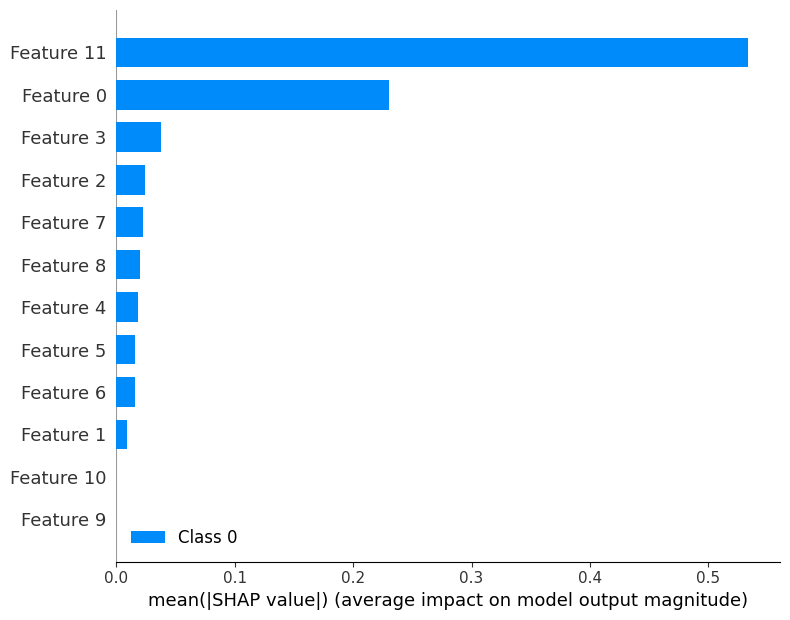

In [25]:
shap.summary_plot(shap_values,X_test)

In [37]:
from pprint import pprint

pprint(shap_values)

[array([[-0.14839236,  0.00116335, -0.00417168, ...,  0.        ,
         0.        , -0.41743748],
       [-0.28570451,  0.00346243,  0.01876722, ...,  0.        ,
         0.        , -0.35187869],
       [ 0.52238609,  0.01907517, -0.06526744, ...,  0.        ,
         0.        ,  0.45399423],
       ...,
       [ 0.33821823,  0.02771477,  0.04974345, ...,  0.        ,
         0.        ,  0.33255674],
       [-0.10944043,  0.00473355, -0.00625015, ...,  0.        ,
         0.        , -0.45400665],
       [-0.30123004,  0.00365542, -0.01017995, ...,  0.        ,
         0.        , -0.36222923]])]


In [47]:
import pickle
pickle.dump(shap_values, open("shap_values.bin", "wb"))

In [48]:
import pickle
matrix = pickle.load(open("shap_values.bin", "rb"))

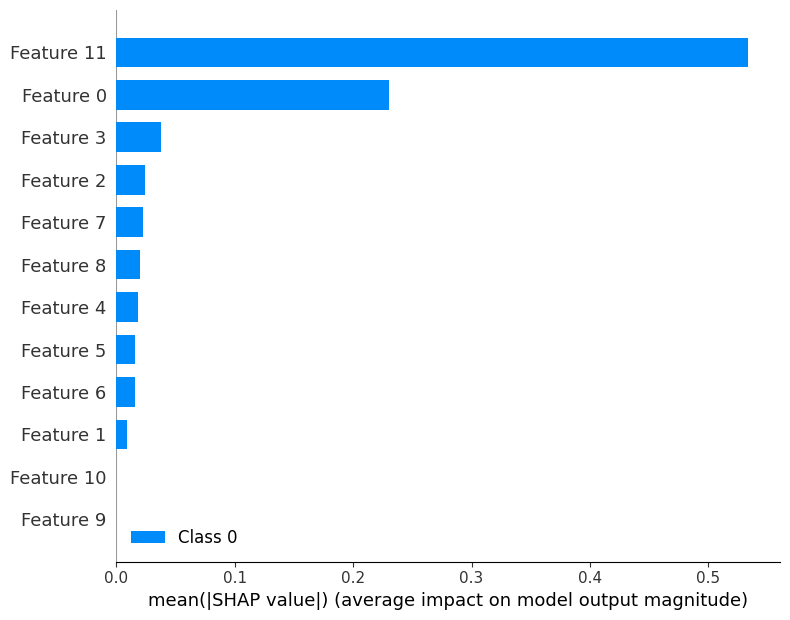

In [49]:
shap.summary_plot(matrix,X_test)

In [ ]:
print(shap.__version__)
print(tf.__version__)


In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
plot_loss(history)